<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/CHAPTER2%20%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용함. 즉 훈련 세트로부터 머신러닝 모델을 만듦. 우리의 목표는 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것임. 지도 학습은 종종 데이터를 만드는 데 사람의 노력이 필요하지만 일단 자동화를 도모하면 힘들고 어려운 작업의 처리 속도를 제고할 수 있음.

# 2.1 분류와 회귀

 지도 학습에는 '분류(classification)'와 '회귀(regression)'가 있음.
 
 분류는 미리 정의된, 가능성 있는 여러 '클래스 레이블(class label)' 중에 하나를 예측하는 것임. 딱 두 개의 클래스로 분류하는 '이진 분류(binary classification)'와 셋 이상의 클래스로 분류하는 '다중 분류(multiclass classification)'로 나뉨. 1장에서 붓꽃을 세 품종 중 하나로 분류하는 문제는 붓꽃 품종이 3개이므로 다중 분류 문제임. 

 이진 분류는 질문의 답이 예와 아니오만 나올 수 있게 하는 것임. 이메일에서 스팸을 분류하는 것이 대표적인 예이며 예/아니오 대답에 대한 질문은 "이 이메일은 스팸인가요?" 가 됨. 한 클래스를 양성(positive) 클래스, 다른 하나를 음성(negative) 클래스라고 하는데, 양성 클래스는 학습하고자 하는 대상을 의미하므로 스팸 메일이 양성 클래스가 되는 것임. 다만 두 클래스 중에 어떤 것을 양성으로 정할지는 주관적인 문제이므로 분야에 따라 다름. 다른 예로는 웹사이트의 글을 사용하여 어떤 언어의 웹사이트인지 예측하는 문제가 있는데, 이 문제에서 클래스는 미리 만들어놓은 언어 목록임.

 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 '부동소수점수(수학 용어로는 실수)'를 예측하는 것임. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예임. 소득을 예측할 때 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될 수 있음. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등로 올해 수확량을 예측하는 예도 회귀 문제이며 수확양 또한 어떤 숫자든 가능함.

 출력 값에 연속성이 있는지 질문하면 회귀와 분류 문제를 쉽게 구분할 수 있음. 예상 출력 값 사이에 연속성이 있다면 회귀 문제임. 연소득을 예측하는 경우 출력에 확연한 연속성이 존재하는데, 어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 벌 수 있다면  그 양은 분명 다르지만 큰 차이는 아님. 즉 우리 알고리즘이 40,000,000원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 해도 큰 문제가 되지 않음.

 반대로 분류 문제로서 웹사이트가 어떤 언어로 구성되어 있는지 인식하는 작업에는 정도란 것이 존재할 수가 없음. 한 언어가 아니면 다른 언어임. 언어 사이에는 연속성이 없고 영어와 프랑스어 사이에 다른 언어는 없음. 물론 언어를 독립적이고 고정된 것으로 표현하는 것은 무리가 있음. 

# 2.2 일반화, 과대적합, 과소적합

 지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것으로 기대함. 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함. 그래서 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 함.

 보통 훈련 세트에 대해 정확하게 예측하도록 모델을 구축함. 훈련 세트와 테스트 세트가 매우 비슷하면 그 모델이 테스트 세트에서도 정확하게 예측할 것으로 기대할 수 있음. 하지만 항상 그런 것도 아닌데, 예를 들어 아주 복잡한 모델을 만들면 훈련 세트에만 정확한 모델이 될 가능성도 있음.

 가상의 예를 만들어 봄. 요트를 구매한 고객과 구매 의사가 없는 고객의 데이터를 활용하여 누가 요트를 살지 예측하려고 함. 무관심한 고객들이 아닌 실제로 구매할 것 같은 고객들에게만 홍보 메일을 보내는 것이 목표임. 다만 이게 좀 까다로운 문제인 이유는 아직 요트를 사지 않았다고 알고 있던 고객이 사실 다른 곳에서 요트를 샀을지도 모르고, 나중에 요트를 사려고 저축하거나 계획해뒀을 수도 있다는 것임.

 아래는 고객 샘플 데이터임. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1TMAwRvCh9gsF2kiUOpl35nyhA5nA0o5X' width = 50% >

 이 데이터를 활용하여 새로운 고객이 요트를 구매할 것인가에 대한 질문에 만족할 만한 답을 줄 수 있는 모델을 만들어야 함. 새로운 고객에도 잘 작동하는 규칙을 찾아야 하므로 훈련 세트에서 100% 정확도를 달성하는 것은 크게 도움이 되지 않음. 테스트 세트를 따로 활용하여 훈련 세트와 테스트 세트의 정확도를 가장 근접한 지점까지 맞춰야 함. 우리가 예측하려는 대상은 이 데이터셋이 아니라 새로운 고객이기 때문임. 알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 테스트 세트로 모델을 평가하는 수밖에 없음.
 
 직관적으로 이 데이터를 보면 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있음. 예를 들면 "50세 이상인 사람은 보트를 사려고 한다." 라는 규칙을 만들었다면 이 규칙은 모든 고객 데이터를 만족시킬 뿐만 아니라, 나이 외에 자녀 수나 혼인 상태를 추가한 규칙보다 더 신뢰할 수 있음. 그러므로 항상 간단한 모델만 찾으려는 늪에 스스로 빠지는 것임.

 주목해야 할 점은 '과대적합(overfitting)'과 '과소적합(underfitting)'이 일어나지 않도록 일반화 성능이 최대가 되는 최적점에 있는 모델을 만들어야 한다는 것임.
 
 '과대적합'은 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 의미하며 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어나는 현상임. 즉 훈련 세트 점수가 지나치게 높고 테스트 세트 점수가 지나치게 낮은 것을 의미함. 
 
 '과소적합'은 너무 간단한 모델을 만드는 것을 의미하며 "주택을 보유한 사람은 모두 요트를 사려고 한다." 와 같은 규칙만을 적용하면 데이터의 면면과 다양성을 잡아내지 못하고 훈련 세트에도 잘 맞지 않을 것임. 즉 훈련 세트 점수가 낮고 테스트 세트 점수가 높거나, 훈련 세트 점수와 테스트 세트 점수 모두 낮은 것을 의미함.

 정리하자면 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확하게 예측할 수 있으나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져서 새로운 데이터에 잘 일반화되지 않음. 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델임.

과대적합과 과소적합의 절충점을 아래 그림에서 나타냄. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >



## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

 모델 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음. 보통 데이터 포인트를 더 많이 모으는 것이 다양성을 키워주므로 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 함. 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않음.

 위 요트 판매 예로 돌아가면, 고객 데이터를 10,000개 모았더니 전부 "45세 이상이고 자녀가 셋 미만이며 이혼하지 않는 고객은 요트를 사려고 한다." 라는 규칙을 만족한다면 위 [표 2-1]의 12개만 사용할 때보다 훨씬 좋은 규칙이라고 할 수 있음.

 데이터를 더 많이 수집하고 적절하게 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을 수 있음. 이 책에서는 고정 크기의 데이터셋을 사용하는 데 집중함. 모델을 변경하거나 조정하는 것보다 이득일 수 있으므로 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야 함. 

# 2.3 지도 학습 알고리즘

 각 알고리즘을 자세히 설명하는 내용을 모두 읽을 필요는 없지만 모델을 이해하면 여러 머신러닝 알고리즘의 작동 방식을 더 잘 알 수 있음. 

## 2.3.1 예제에 사용할 데이터셋

 여러 알고리즘을 설명하기 위해 데이터셋도 여러 개를 사용함. 어떤 데이터셋은 작고 인위적으로 만든 것이며, 알고리즘의 특징을 부각하기 위해 만든 것도 있음. 실제 샘플로 만든 큰 데이터셋도 있음.

 두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋임. 다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그림. x축은 첫 번째 특성, y축은 두 번째 특성임. 모든 산점도가 그렇듯이 점 하나가 각 데이터 포인트를 나타냄. 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타냄.

In [ ]:
pip install mglearn

In [ ]:
# 라이브러리를 임포트 함.
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape: (26, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


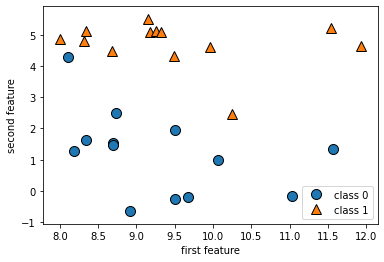

In [ ]:
# 데이터셋을 만듦.
X, y = mglearn.datasets.make_forge()
print(X, y)

# 산점도를 그림.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

print('X.shape:', X.shape)
# 데이터 포인트 26개, 특성 2개를 가짐.

 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용함. wave 데이터셋은 입력 특성 하나와 모델링 할 타깃 변수(또는 응답)를 가짐. 종이는 2차원이므로 특성 2개가 넘으면 표현하기 어려우니 손쉽게 시각화하기 위해 간단한 저차원 데이터셋을 사용함. 특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋(고차원 데이터셋)에서 유지되지 않을 수 있지만 알고리즘을 익힐 때는 저차원 데이터셋을 사용하는 것이 매우 좋음.

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

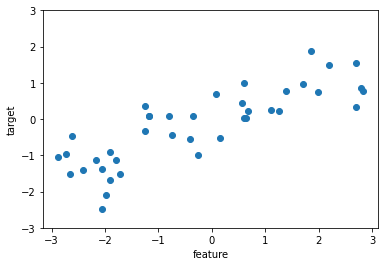

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(X, y)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

print('X.shape:', X.shape)

인위적인 소규모 데이터셋 외에 사이킷런에 들어 있는 실제 데이터셋 두 개도 사용함. 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) 데이터셋이며 줄여서 cancer라고 함. 각 종양은 양성(benign)과 악성(malignant)으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지 여부를 예측할 수 있도록 학습하는 것이 과제임. 이 데이터는 사이킷런에 있는 'load_breast_cancer' 함수를 사용하여 가져올 수 있음.

 사이킷런에 포함된 데이터셋은 실제 데이터와 데이터셋 관련 정보를 담고 있는 Bunch 객체에 저장되어 있음. Bunch 객체는 파이썬 딕셔너리(dictionary)와 비슷하지만 점 표기법을 사용할 수 있음. 즉 'bunch['key']' 대신 'bunch.key'를 사용할 수 있음.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print('cancer.keys():', cancer.keys())
print('유방암 데이터의 형태:', cancer.data.shape)
print('특성 이름:\n', cancer.feature_names)

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.target_names)
print(cancer.target)
print(np.bincount(cancer.target))
# malignant가 0, benign이 1임.

print('클래스별 샘플 개수:', {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# 'target_names' 에는 malignant와 benign이 들어있는데, 여기에서 하나씩 꺼내서 n에 넣고,
# 'target' 에는 0과 1이 들어있는데, 각 숫자 개수를 세서 v에 넣으면 딕셔너리가 만들어짐.
# 'np.bincount' 함수에 대한 'https://runebook.dev/ko/docs/numpy/reference/generated/numpy.bincount' 를 참고 바람.
# 위 링크로 접속하려면 ctrl키를 누르고 링크를 클릭하면 됨.

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [ ]:
print('자세한 정보:\n', cancer.DESCR)

자세한 정보:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean 

 아울러 회귀 분석용 실제 데이터셋으로 보스턴 주택가격(Boston Housing) 데이터셋을 사용함. 이 데이터셋으로 할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용하여 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것임. 이 데이터셋에는 데이터 포인트 506개, 특성 13개가 있음.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태:', boston.data.shape)

데이터의 형태: (506, 13)


In [ ]:
print('자세한 정보:\n', boston.DESCR)

자세한 정보:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PT

이 데이터셋에서는 입력 특성 13개뿐만 아니라 특성끼리 곱하여(또는 상호작용이라 일컬음) 의도적으로 확장함. 다시 말하면 범죄율과 고속도로 접근성의 개별 특성은 물론 범죄율과 고속도로 접근성의 곱도 특성으로 여긴다는 뜻임. 이렇게 특성을 유도하는 것을 '특성 공학(feature engineering)'이라고 함. 4장에서 자세하게 다룸. 유도된 데이터셋은 'load_extended_boston' 함수를 사용하여 부를 수 있음.

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)
# 특성 13개에서 중복을 포함하여 2개씩 짝지은 특성 91개를 더해서 104개가 됨.
# 첫 번째 특성으로 교차항 13개가 만들어지고,
# 두 번째 특성으로 교차항 12개가 만들어짐.
# 세 번째 특성으로 교차항 11개가 만들어짐.
# 13 + 12 + 11 + ... + 1 = 91개

X.shape: (506, 104)


위 특성 공학에 대한 설명으로 이항 계수 공식을 추가함.   
중복을 고려하지 않은 이항 계수의 공식은 $\begin{pmatrix} n\\ k\\ \end{pmatrix} = \frac{n!}{k!(n-k)!}$이므로 $\frac{13!}{2!(13-2)!}=78$이 됨.   

'load_extend_boston' 함수는 사이킷런의 'PolynomialFeatures' 함수를 사용하여 중복을 포함한 조합을 만듦.   
중복을 포함한 조합의 수를 구하는 공식은 $\begin{pmatrix} \begin{pmatrix} n\\ k\\ \end{pmatrix} \end{pmatrix} = \begin{pmatrix} n+k-1\\ k\\ \end{pmatrix}$이므로 $\frac{14!}{2!(14-2)!}=91$이 됨.

## 2.3.2 k-최근접 이웃
 'k-NN(k-Nearest Neighbors)' 알고리즘은 머신러닝 알고리즘 중에 가장 간단함. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 전체 과정임. 새로운 데이터에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음. 최근접 이웃의 개수는 k이며 'n_neighbors' 매개변수에 지정함.

### k-최근접 이웃 분류

 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아서 예측에 사용함. 단순하게 이 훈련 데이터 포인트의 출력이 예측됨.

forge 데이터셋에 대한 1-최근접 이웃 모델의 예측 그래프를 그림. 데이터 포인트(별 모양) 3개를 추가함. 그리고 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결함. 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 되며 같은 색으로 연결하여 표시함.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


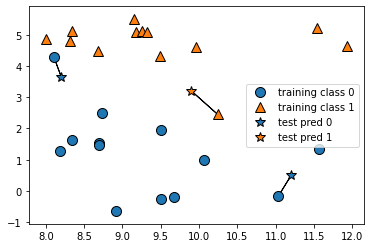

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

둘 이상의 이웃(k)을 선택할 경우에는 레이블을 정하기 위해 테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 클래스 1에 속한 이웃이 몇 개인지 셈. 그리고 이웃이 더 많은 클래스를 레이블로 지정함. 다시 말하면 k-최근접 이웃 중에 다수의 클래스가 레이블이 됨. 최근접 이웃 3개를 사용하는 그림을 그림.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


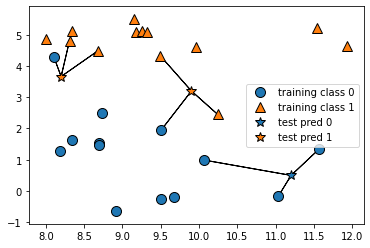

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

여기에서도 예측은 연결된 데이터 포인트의 색으로 나타냄. 새 데이터 포인트 중에 왼쪽 위의 것은 클래스 3개 중에 클래스1이 2개이면서 다수이므로 이웃을 하나만 사용했을 때와 예측이 달라짐.   
이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있음. 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지 헤아려서 가장 많은 클래스를 예측값으로 사용함.

사이킷런을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살핌. 먼저 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


'KNeighborsClassifier'를 임포트 하고 객체를 만들고 이웃의 수를 지정하는 'n_neighbors' 매개변수를 3으로 지정함.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

훈련 세트를 사용하여 분류 모델을 학습시킴. 'KNeighborsClassifier'의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것임.

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 'predict' 메서드를 호출하여 예측함. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 후에 가장 많은 클래스를 찾음.

In [ ]:
print('테스트 세트 예측:', clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


모델이 잘 일반화되었는지 평가하기 위해 'score' 메서드에 테스트 데이터와 테스트 레이블을 넣고 호출함.

In [ ]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


이 모델의 정확도는 86%로 측정됨. 모델이 테스트 데이터셋에 있는 샘플 중에 86%를 정확하게 예측한 것을 의미함.

### KNeighborsClassifier 분석

 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그릴 수 있음. 더불어 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함. 이 과정을 통해 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 '결정 경계(decision boundary)'를 확인할 수 있음.

다음 코드는 이웃이 1, 3, 9개일 경우 결정 경계를 보여줌.

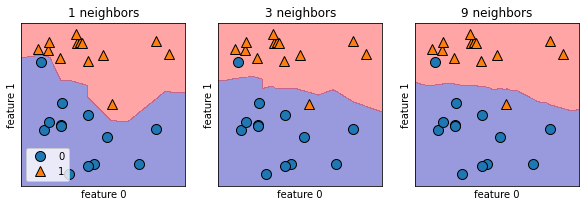

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # 'fit' 메서드는 self 오브젝트를 리턴 하므로 객체 생성과 'fit' 메서드를 한 줄에 쓸 수 있음.
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

위 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있으나, 이웃의 수를 늘릴수록 결정 경계가 점점 부드러워짐. 부드러운 경계는 더 단순한 모델을 의미함. 이웃을 적게 사용하면 모델 복잡도가 높아지고 많이 사용하면 복잡도는 낮아짐. 훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃(모든 훈련 데이터)을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 됨. 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨.

앞서 살펴봤던 모델 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴봄. 이를 위해 실제 데이터인 유방암 데이터셋을 사용함. 먼저 훈련 세트와 테스트 세트로 나누고 이웃의 수를 다르게 해서 훈련 세트와 테스트 세트의 성능을 평가함.

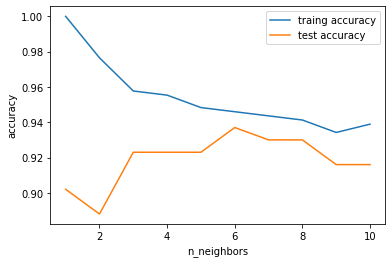

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 ~ 10까지 n_neighbors를 적용함.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델을 생성함.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도를 저장함.
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도를 저장함.
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='traing accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

이 그림은 n_neighbors 수(x축)에 따른 훈련 세트와 테스트 세트 정확도(y축)를 보여줌. 실제 이런 그래프는 매끈하게 나오지 않지만 여기서도 과대적합과 과소적합 현상을 볼 수 있음. 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태임. 최근접 이웃인 k의 수가 하나일 경우에는 훈련 데이터에 대한 예측이 완벽함. 그러나 이웃의 수가 늘어날수록 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦. 이웃을 많이 사용했을 경우보다 이웃을 하나 사용한 테스트 세트의 정확도는 낮은데 이는 모델을 너무 복잡하게 만든 것을 의미함. 반대로 이웃을 10개 사용했을 경우에는 모델이 너무 단순해서 정확도는 더 나빠짐. 정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우임. 그래프의 범위를 눈여겨보면 가장 나쁜 정확도도 88%여서 인정할 만함.

### k-최근접 이웃 회귀

 k-최근접 이웃 알고리즘은 회귀 분석에도 쓰임. 이번에는 wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용함. x축에 테스트 데이터 3개를 흐린 별 모양으로 표시함. 최근접 이웃을 1개만 이용할 때 예측은 그저 가장 가까운 이웃의 타깃값이며 진한 별 모양으로 표시함.

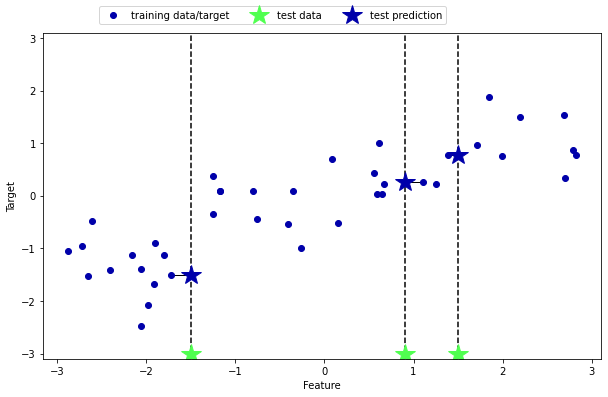

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

 여기에서도 이웃을 둘 이상 사용할 수 있음. 최근접 이웃 여러 개를 사용하면 이웃 간 평균을 예측으로 삼음.

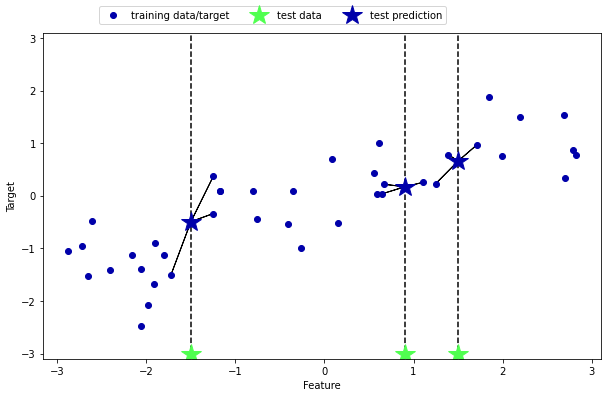

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

 사이킷런에 회귀를 위한 k-최근접 이웃 알고리즘은 'KNeighborsRegressor' 클래스에 구현되어 있으며 사용법은 'KNeighborsClassifier' 클래스와 비슷함.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 지정하여 모델의 객체를 만듦.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

 테스트 세트에 대해 예측함.

In [ ]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


 'score' 메서드를 사용하여 모델을 평가함. 이 메서드는 회귀일 땐 '결정 계수'를 뜻하는 $R^2$ 값을 반환함. 이 값은 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0~1 사이 값임. 1은 완벽하게 예측한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우임. 물론 음수가 될 수도 있는데 이 경우는 예측과 타깃이 상반된 경향을 가지는 것을 의미함.

 $R^2 = 1-\frac{\sum_(y-\hat{y})^2}{\sum_(y-\overline{y})^2}$

 $y$는 타깃값, $\overline{y}$는 타깃값의 평균, $\hat{y}$는 모델의 예측값임.

 참고로 무조건 y_train의 평균값을 예측으로 사용하면 $R^2$의 공식에서 $\hat{y}$이 $\overline{y}$와 같게 되고 분자와 분모가 같아져서 최종 계산값은 0이 됨.

In [ ]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


 점수가 0.83이므로 나름 잘 맞은 편임.

### KNeighborsRegressor 분석

 이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어서 예측할 수 있음. 이를 위해 x축을 따라 많은 포인트를 생성하여 테스트 데이터셋을 만듦.

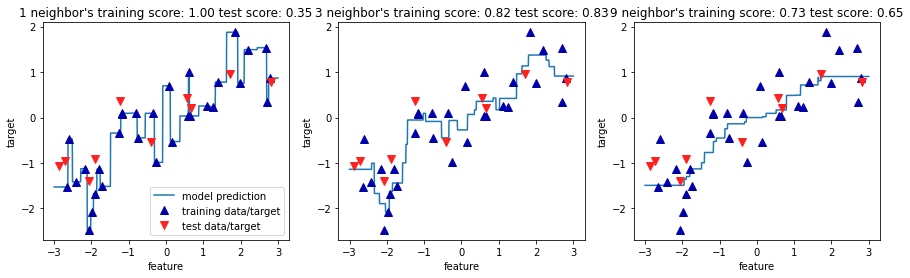

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3~3 사이에 데이터 포인트 1,000개를 만들고 2차원 배열로 바꿈.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 함.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor's training score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model prediction', 'training data/target', 'test data/target'], loc='best')

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가므로 매우 불안정하게 예측함. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있으나 더 안정된 예측을 얻게 됨.

### 장단점과 매개변수

 일반적으로 'KNeighbors' 분류기에 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법, 이웃의 수임. 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만 신경 써서 조정해야 함. 거리 재는 방식은 더 다루지 않지만 기본적으로 여러 환경에서 잘 작동하는 방식은 '유클리디안 거리' 방식임.

 'k-NN'의 장점은 이해하기 매우 쉬운 모델이라는 점, 많이 조정하지 않아도 자주 좋은 성능을 발휘한다는 점임. 더 복잡한 알고리즘을 적용하지 전에 시도해볼 수 있음.
 
 보통 최근접 이웃 모델은 매우 빠르게 만들 수는 있지만 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 크면) 예측이 느림. k-NN 알고리즘을 사용할 땐 데이터를 전처리 하는 과정(3장에서 다룸)이 중요함. 아울러 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 동작하지 않고 특성 값 대부분이 0인 희소한 데이터셋과는 특히 잘 작동하지 않음.

 결론적으로 k-최근접 이웃 알고리즘은 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해서 현업에서 거의 쓰지 않음.

## 2.3.3 선형 모델

 '선형 모델(linear model)'은 100여 년 전에 개발되었고 지난 몇십 년간 폭넓게 연구되며 현재도 널리 쓰임. 입력 특성에 대한 '선형 함수'를 만들어 예측을 수행함.

### 회귀의 선형 모델

 회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같음.

 $\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$

 이 식에서 $x[0]$부터 $x[p]$까지는 데이터 포인트 하나에 대한 특성을 나타내며(특성 개수는 p + 1), $w$와 $b$는 모델이 학습할 파라미터임. $\hat{y}$은 모델이 만들어낸 예측값임. 특성이 하나인 데이터셋이라면 이 식은 다음과 같아짐.

 $\hat{y} = w[0] \times x[0] + b$

 $w[0]$은 기울기, $b$는 y축과 만나는 절편임. 특성이 많아지면 $w$는 각 특성에 해당하는 기울기를 모두 가짐. 다르게 생각하면 예측값은 입력 특성에 $w$의 각 가중치(음수일 수도 있음)를 곱해서 더한 가중치 합으로 볼 수 있음.

 1차원 wave 데이터셋으로 파라미터 $w[0]$와 $b$를 직선처럼 되도록 학습시킴.

w[0]: 0.393906  b: -0.031804


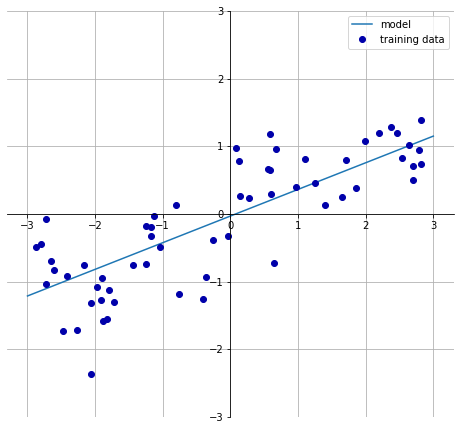

In [ ]:
mglearn.plots.plot_linear_regression_wave()

 직선 방정식을 이해하기 쉽도록 그래프의 중앙을 가로질러서 x, y축을 그림. $w[0]$ 값을 보면 기울기는 대략 0.4 정도여야 하며, 그래프에서 확인할 수 있음.

 회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많음)에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐.

 이 직선과 KNeighborsRegressor를 사용해서 만든 위 그래프의 선과 비교하면 직선을 사용한 예측이 제약이 더 많아 보임. 데이터의 상세 정보를 모두 잃어버린 것처럼 보임. 타깃 y가 특성들의 선형 조합이라는 건 매우 과하고 때론 비현실적인 가정임. 다만 1차원 데이터만 놓고 봐서 생긴 편견일 수 있는데, 특성이 많은 데이터셋이면 선형 모델은 매우 훌륭한 성능을 낼 수 있음. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 훈련 세트에 대해서 선형 함수로 모델링 할 수 있음.(선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 '불충분한 시스템(underdetermined system)'이라고 하며 일반적으로 무수하게 많은 해가 존재함.)

 회귀를 위한 선형 모델은 다양함. 이 모델들은 훈련 데이터로부터 모델 파라미터 $w$와 $b$를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남. 아래부터는 회귀에서 가장 인기 있는 선형 모델들을 살핌.

### 선형 회귀(최소제곱법)

 '선형 회귀(linear regression)' 또는 '최소제곱법(OLS, ordinary least squares)'은 가장 간단하고 오래된 회귀용 선형 알고리즘임. 예측과 훈련 세트에 있는 타깃 y 사이의 '평균제곱오차(mean squared error)'를 최소화하는 파라미터 $w$와 $b$를 찾음. 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플 개수로 나눈 것임. 선형 회귀는 매개변수가 없는 것이 장점이지만 모델의 복잡도를 제어할 방법도 없음.

 평균제곱오차의 공식은 MSE = $\frac{1}{n} \displaystyle\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$이고 n은 샘플 개수를 의미함.

선형 모델을 만듦.

In [56]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

 기울기 파라미터($w$)는 '가중치(weight)' 또는 '계수(coefficient)'라고 하며 lr 객체의 'coef_' 속성에 저장됨. '편향(intercept)' 파라미터($b$)는 'intercept_' 속성에 저장됨.

In [58]:
print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)
# 사용자가 지정한 매개변수와 구분하고자 속성 뒤에 '_'를 붙임. 
# 즉 사이킷런의 경우는 훈련 데이터에서 유도된 속성은 항상 끝에 '_'를 붙임. 

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


 'coef_' 속성은 각 입력 특성에 하나씩 대응되는 넘파이 배열임. wave 데이터셋에는 입력 특성이 하나뿐이므로 'lr.coef_'는 원소를 하나만 갖고 있음. 'intercept_' 속성은 항상 실수값 하나임.

 훈련 세트와 테스트 세트의 성능을 확인함.

In [60]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


 $R^2$ 값이 0.66인 건 그리 좋은 결과라고 할 수 없음. 아울러 훈련 세트와 테스트 세트의 점수가 매우 비슷하면서 낮음. 이는 과소적합 상태를 의미함. 1차원 데이터셋에서는 모델이 매우 단순하거나 제한적이므로 과대적합이 일어날 가능성이 낮으나, 특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이 일어날 가능성이 높음.

 'LinearRegression' 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 작동하는지 살핌. 이 데이터셋에는 샘플 506개, 특성은 위에서 특성공학으로 유도한 것까지 합쳐서 104개임. 먼저 데이터셋을 읽고 훈련 세트와 테스트 세트로 나눈 후에 선형 모델을 만듦.

In [61]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

 훈련 세트와 테스트 세트의 점수를 비교함.

In [62]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


 훈련 세트에서는 예측이 매우 정확한데 테스트 세트에서는 $R^2$ 값이 매우 낮음. 이러한 성능 차이는 모델이 과대적합 된 것을 나타내므로 복잡도를 제어할 수 있는 모델을 사용해야 함. 아래에서 설명하는 '리지(Ridge)'와 '라소(Lasso)'를 토대로 설명함.

### 리지 회귀

 '리지(Ridge)'도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용함. 다만 리지 회귀에서의 가중치($w$) 선택은 훈련 데이터를 잘 예측하기 위한 목적뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음. 가중치의 절댓값을 가능한 한 작게 만드는 것임. 다시 말하면 $w$의 모든 원소가 0에 가깝게 되길 원함. 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게 만든다)고 생각할 수 있음. 이런 제약을 '규제(regularization)'라고 하며 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미임. 리지 회귀에 사용하는 규제 방식을 'L2 규제'라고 함.

 리지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살핌.

In [63]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


결과를 보면 훈련 세트 점수는 'LinearRegression'보다 낮지만 테스트 세트에 대한 점수는 더 높음. 리지는 선형 회귀보다 덜 자유로운 모델이기 때문에 과대적합이 적어짐. 모델 복잡도가 낮아지면 훈련 세트에서 성능은 나빠지지만 더 일반화된 모델이 됨. 테스트 세트에 대한 성능을 제고해야 하므로 리지 모델을 선택해야 함.

 리지는 모델을 단순하게(계수를 0에 가깝게) 하고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공함. 사용자는 'alpha' 매개변수로 훈련 세트 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음. 앞의 예제에서는 'alpha' 매개변수의 기본값인 1.0을 사용했으나 이 값이 최적이라고 생각할 근거는 없음. 최적의 'alpha' 값은 사용하는 데이터셋마다 달라지며, 'alpha' 값을 높이면 계수를 0에 더 가깝게 만들기 때문에 훈련 세트 성능은 나빠지지만 일반화하는 데 도움이 됨.

In [64]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.788279
테스트 세트 점수: 0.635941


 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >

 'alpha' 값을 높이면 계수에 대한 제약이 강해지면서 그림의 왼쪽으로 이동함.

  반면에  'alpha' 값을 줄이면 계수에 대한 제약이 약해지면서 그림의 오른쪽으로 이동함. 아주 작은 'alpha' 값은 계수를 거의 제한하지 않으므로 'LinearRegression'으로 만든 모델과 거의 같아짐. (실험한 바에 의하면 'alpha' 값을 0.00001로 지정하면 'LinearRegression'에서 얻은 훈련 세트 점수 0.95, 테스트 세트 점수 0.61과 완전 동일해짐.)

In [66]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.928227
테스트 세트 점수: 0.772207


 'alpha' 값을 0.1로 지정했을 때 꽤 좋은 성능을 낸 것 같지만 여전히 과대적합 됨. 테스트 세트에 대한 성능이 높아질 때까지 값을 조정해야 함. 좋은 매개변수를 지정하는 방법은 5장에서 자세하게 다룰 예정임.

 'alpha' 값에 따라 모델의 'coef_' 속성이 어떻게 달라지는지 조사하면 'alpha' 매개변수가 모델을 어떻게 변경시키는지 자세하게 이해할 수 있음. 작은'alpha' 값일 때보다 높은 'alpha' 값일 때 제약이 더 많은 모델이므로 'coef_' 속성의 절댓값 크기는 더 작을 것으로 예상할 수 있음.

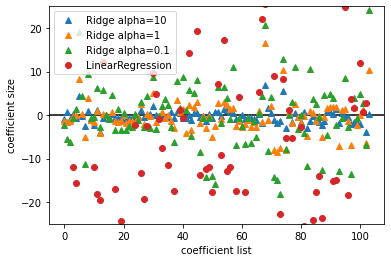

In [67]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, '^', label='Ridge alpha=1')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('coefficient list')
plt.ylabel('coefficient size')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

 x축은 'coef_' 속성의 원소를 위치대로 나열한 것임. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수임. 이렇게 x=100까지 계속됨.

 y축은 각 계수의 수치를 나타냄. alpha=10일 때 계수 대부분은 -3~3 사이에 위치하며, alpha=1일 때 계수는 좀 더 커졌음. alpha=0.1일 때 계수는 더 커지며 규제가 전혀 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져서 그림 밖으로 넘어감.

규제의 효과를 이해하는 다른 방법은 'alpha' 값을 고정하고 훈련 데이터의 크기를 변화시키는 것임. 아래 그림은 보스턴 주택가격 데이터셋에서 여러 크기로 샘플링 해서 'LinearRegression'과 'Ridge(alpha=1)'을 적용한 것임. 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 '학습 곡선(learning curve)'이라고 함. (훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에서는 반복 횟수에 따른 성능 변화를 나타내는 그래프를 학습 곡선이라고 함.)

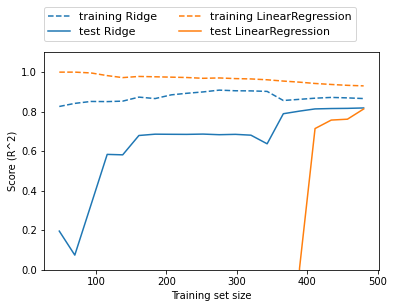

In [68]:
mglearn.plots.plot_ridge_n_samples()

 모든 데이터셋에 대해 선형 회귀와 리지 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음. 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전반적으로 선형 회귀의 훈련 데이터 점수보다 낮지만, 테스트 데이터에서는 리지의 점수가 더 높고 작은 데이터셋에서도 더 높음. 데이터셋 크기가 400 미만인 지점에서는 선형 회귀는 어떤 것도 학습하지 못하고 있음. 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음.

 주목할 점은 데이터를 충분히 사용하면 규제 항은 덜 중요해지므로 리지 회귀와 선형 회귀의 성능이 같아진다는 것임. 그리고 데이터를 충분히 사용하면 선형 회귀의 훈련 데이터 성능이 점차 감소하는 것을 알 수 있는데, 이러한 이유는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합 되기 어려워지기 때문임.

### 라소

### 분류용 선형 모델

### 다중 클래스 분류용 선형 모델

### 장단점과 매개변수

## 2.3.4 나이브 베이즈 분류기

### 장단점과 매개변수

## 2.3.5 결정 트리

### 결정 트리 만들기

### 결정 트리의 복잡도 제어하기

### 결정 트리 분석

### 트리의 특성 중요도

### 장단점과 매개변수

## 2.3.6 결정 트리의 앙상블

### 랜덤 포레스트

#### 랜덤 포레스트 구축

#### 랜덤 포레스트 분석

#### 장단점과 매개변수

### 그레이디언트 부스팅 회귀 트리

#### 장단점과 매개변수

## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

### 배깅

### 엑스트라 트리

### 에이다부스트

## 2.3.8 커널 서포트 벡터 머신

### 선형 모델과 비선형 특성

### 커널 기법

### SVM 이해하기

### SVM 매개변수 튜닝

### SVM을 위한 데이터 전처리

### 장단점과 매개변수

## 2.3.9 신경망(딥러닝)

생략 예정.

# 2.4 분류 예측의 불확실성 추정

## 2.4.1 결정 함수

## 2.4.2 예측 확률

##2.4.3 다중 분류에서의 불확실성

# 2.5 요약 및 정리